In [1]:
from ripser import Rips
from numpy import inf
import pandas as pd
import numpy as np

In [2]:
opoints = pd.read_csv('test_data.csv', header = None)
opoints = np.array(opoints)
opoints.shape

(6, 3)

In [3]:
opoints

array([[10, 14,  5],
       [ 1,  2, 12],
       [13, 10, 14],
       [ 1, 14,  2],
       [11,  9, 10],
       [ 1, 11,  9]], dtype=int64)

In [4]:
tpoints = pd.read_csv('outpy.csv', header = None)
tpoints = np.array(tpoints)
tpoints.shape

(6, 2)

In [5]:
tpoints

array([[ 0.00000000e+00,  0.00000000e+00],
       [ 1.21706409e+01,  9.49000000e+00],
       [ 8.48268825e+00, -1.33226763e-15],
       [-0.00000000e+00,  9.49000000e+00],
       [ 6.00984010e+00,  3.85505149e+00],
       [ 4.77085804e+00,  3.54834084e+00]])

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


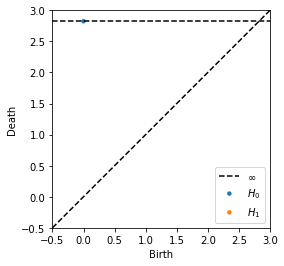

In [6]:
rips = Rips()
diagrams1 = rips.fit_transform(opoints)
rips.plot(diagrams1, xy_range = [-0.5,3,-0.5,3])

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


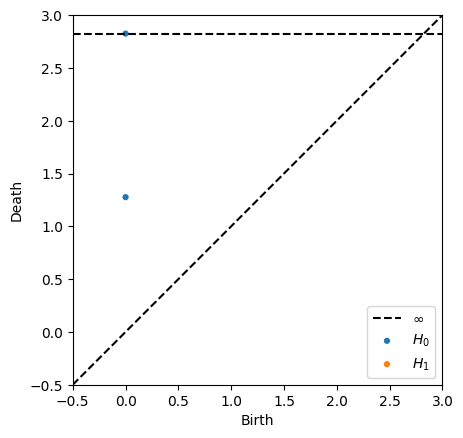

In [7]:
rips = Rips()
diagrams2 = rips.fit_transform(tpoints)
rips.plot(diagrams2, xy_range = [-0.5,3,-0.5,3])

In [8]:
def validate_points(a, b, eps = 1e-4):
    rips = Rips(verbose = False)
    d1 = rips.fit_transform(a)
    rips = Rips(verbose = False)
    d2 = rips.fit_transform(b)
    h0_o = d1[0]
    h0_t = d2[0]
    h0_o[h0_o == inf] = 999999999
    h0_t[h0_t == inf] = 999999999
    mask = np.abs(h0_o - h0_t) > eps
    if np.sum(mask) == 0:
        return True
    else:
        for c, (i,j) in enumerate(mask):
            if i == True or j == True:
                print(f"Original H0: ({h0_o[c][0]:4.4f},{h0_o[c][1]:4.4f})  Transformed H0: ({h0_t[c][0]:4.4f},{h0_t[c][1]:4.4f})")
        return False
       

In [9]:
validate_points(opoints, tpoints, 1e-4)

Original H0: (0.0000,4.5826)  Transformed H0: (0.0000,1.2764)
Original H0: (0.0000,7.1414)  Transformed H0: (0.0000,4.5800)
Original H0: (0.0000,7.6158)  Transformed H0: (0.0000,5.9457)
Original H0: (0.0000,9.4868)  Transformed H0: (0.0000,7.6200)
Original H0: (0.0000,9.4868)  Transformed H0: (0.0000,8.3491)


False

In [8]:
df = pd.read_csv("3d-data-6points-seed-10.csv")
df.to_csv("test_data.csv", index = False, header = False)